1728754905.569301: Called function ImageDataset.__init__ with following information:
   args:   ['<utils.dataset_utils.ImageDataset object at 0x3006f06d0>']
   kwargs: ['directory_path = pistachio_dataset/data/Kirmizi_Pistachio', 'img_size = (32, 32)']
Loading from pretrained at stubs/diffusion-pistachio-32/model_trained_2.


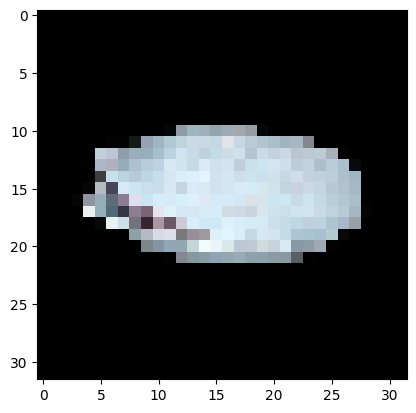

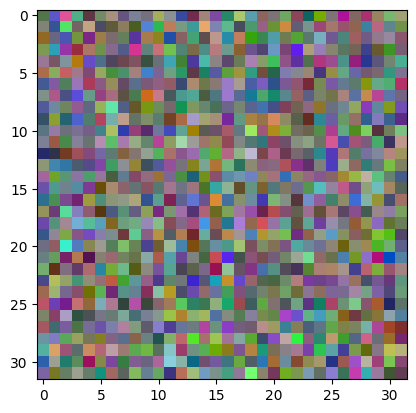

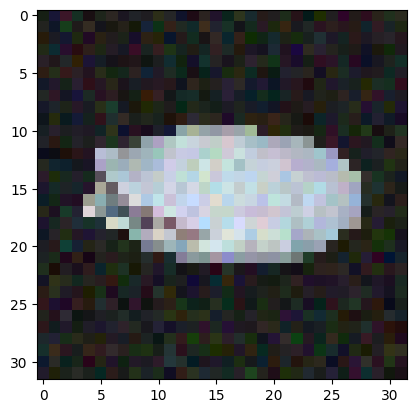

Timestep: 100


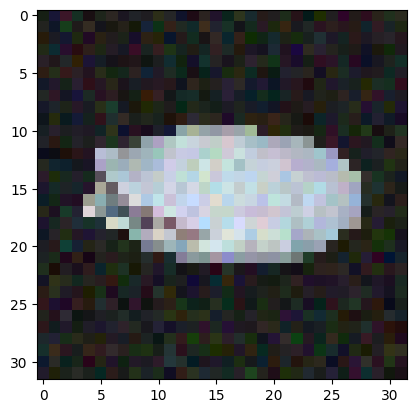

Timestep: 90


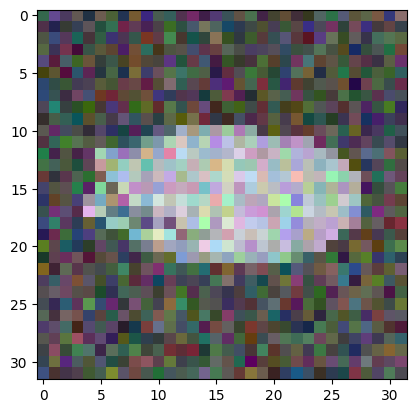

Timestep: 80


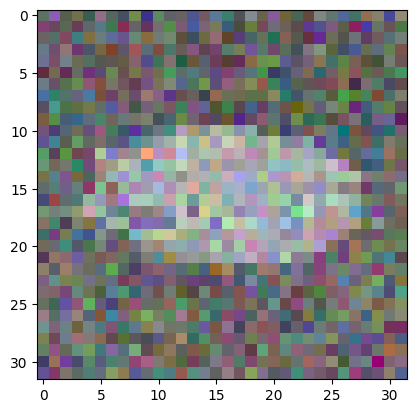

Timestep: 70


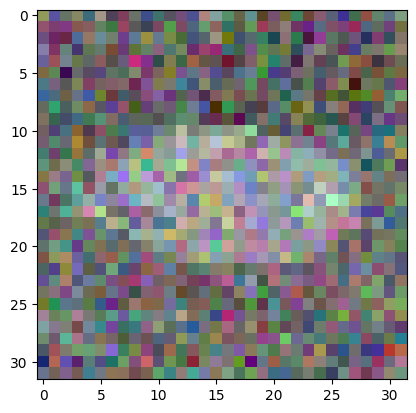

Timestep: 60


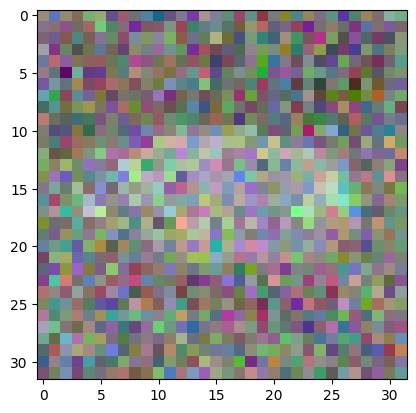

Timestep: 50


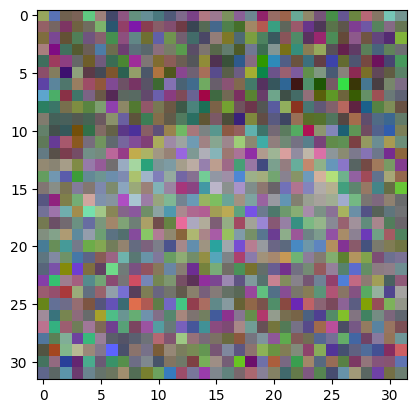

Timestep: 40


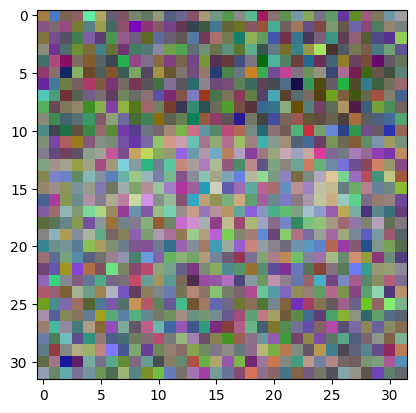

Timestep: 30


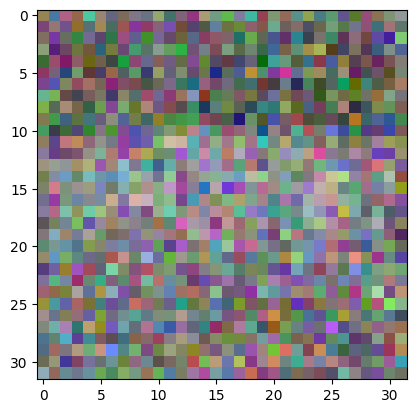

Timestep: 20


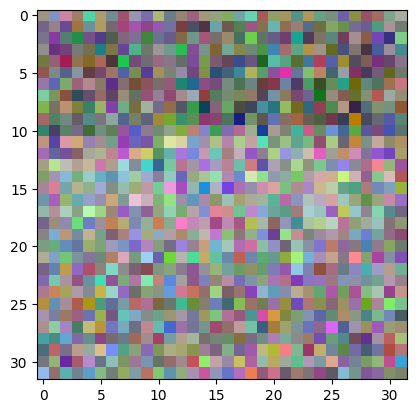

Timestep: 10


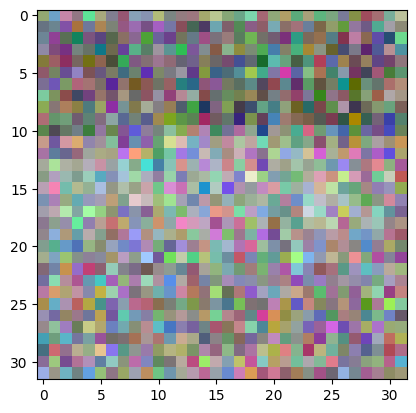

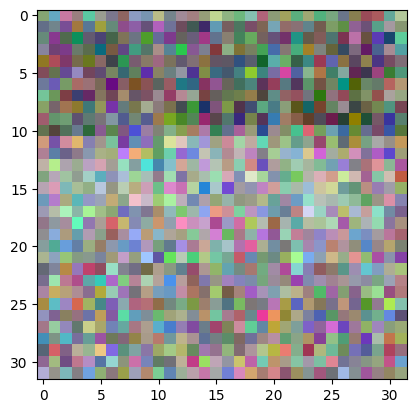

torch.Size([1, 3, 32, 32])


In [3]:
import utils
import diffusers
import matplotlib.pyplot as plt
import torch
from core import UNet2D, MasterModel, TrainingConfig


images = utils.ImageDataset(directory_path="pistachio_dataset/data/Kirmizi_Pistachio",
                            img_size=(32, 32))

model = UNet2D()
training_config = TrainingConfig(num_train_epochs=2)
master_model = MasterModel(model=model.model,
                           training_config=training_config,
                           train_dataset=images,
                           stub_path="stubs/diffusion-pistachio-32/model_trained_2")


start_denoise_step = 100
num_denoising_steps = 100
denoising_step = - start_denoise_step // num_denoising_steps

this_image = images[0].unsqueeze(0).to(dtype=torch.float32)
img, _ = utils.ImageUtils.plot_torch(this_image)

noise = torch.randn(this_image.shape, device=this_image.device)
img, _ = utils.ImageUtils.plot_torch(noise)

noisy = master_model.sampler.add_noise(this_image, noise, torch.Tensor([start_denoise_step]).long())
img, _ = utils.ImageUtils.plot_torch(noisy)

denoised = master_model.sampler.add_noise(this_image, noise, torch.Tensor([start_denoise_step]).long())
# Denoising loop
for i in range(start_denoise_step, 0, denoising_step):
    if i % (10 * denoising_step) == 0:
        print(f"Timestep: {i}")
        denoised_img, _ = utils.ImageUtils.plot_torch(denoised)
    denoised = master_model.forward(noisy, torch.Tensor([i]), predict_denoised=True)
    noisy = denoised

denoised_img, _ = utils.ImageUtils.plot_torch(denoised)
print(denoised.shape)
